In [1]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the dataset
file_path = "/Users/omsapkar/Downloads/Healthcare_Varied_Dataset.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Patient_ID,Age,Gender,Length_of_Stay,Primary_Diagnosis,Secondary_Diagnosis,Insurance_Type,Smoking_Status,Alcohol_Use,BMI,Exercise_Frequency,Diet_Type,Readmitted
0,PID_1,50,Male,87,Cardiovascular,Mental Health,Private,Current,Never,29.5,Daily,Other,1
1,PID_2,67,Male,72,General,Diabetes,Medicare,Never,Never,27.3,Moderately,Vegetarian,0
2,PID_3,34,Female,32,General,Kidney Disease,Medicaid,Never,Never,17.2,Rarely,Vegetarian,1
3,PID_4,75,Non-Binary,78,Orthopedic,Diabetes,Private,Current,Occasionally,39.4,Moderately,Vegan,0
4,PID_5,56,Female,46,Gastrointestinal,Hypertension,Private,Former,Never,29.4,NaN,Vegan,1


Missing values per column:
 Patient_ID                 0
Age                        0
Gender                     0
Length_of_Stay             0
Primary_Diagnosis          0
Secondary_Diagnosis    13964
Insurance_Type             0
Smoking_Status             0
Alcohol_Use                0
BMI                        0
Exercise_Frequency     19596
Diet_Type                  0
Readmitted                 0
dtype: int64


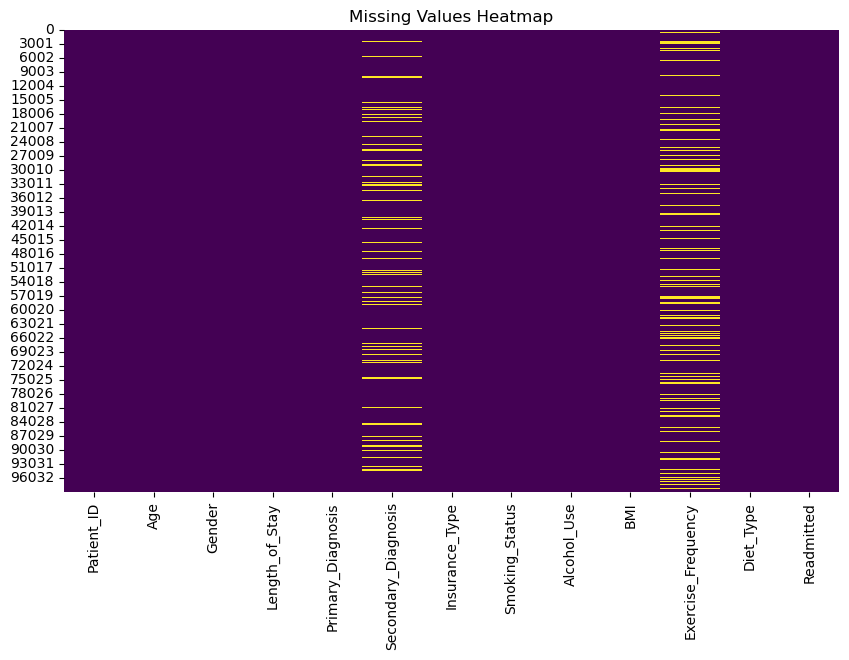

Missing values after cleaning:
 Patient_ID             0
Age                    0
Gender                 0
Length_of_Stay         0
Primary_Diagnosis      0
Secondary_Diagnosis    0
Insurance_Type         0
Smoking_Status         0
Alcohol_Use            0
BMI                    0
Exercise_Frequency     0
Diet_Type              0
Readmitted             0
dtype: int64


In [14]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Drop rows with missing values
data_cleaned = data.dropna()

# Confirm no missing values remain
print("Missing values after cleaning:\n", data_cleaned.isnull().sum())

In [15]:
# Display data types
print("Data types before correction:\n", data_cleaned.dtypes)

# Correct data types
data_cleaned["Age"] = data_cleaned["Age"].astype(int)
data_cleaned["Length_of_Stay"] = data_cleaned["Length_of_Stay"].astype(int)
data_cleaned["Readmitted"] = data_cleaned["Readmitted"].astype(int)

# Confirm data types
print("Data types after correction:\n", data_cleaned.dtypes)

Data types before correction:
 Patient_ID              object
Age                      int64
Gender                  object
Length_of_Stay           int64
Primary_Diagnosis       object
Secondary_Diagnosis     object
Insurance_Type          object
Smoking_Status          object
Alcohol_Use             object
BMI                    float64
Exercise_Frequency      object
Diet_Type               object
Readmitted               int64
dtype: object
Data types after correction:
 Patient_ID              object
Age                      int64
Gender                  object
Length_of_Stay           int64
Primary_Diagnosis       object
Secondary_Diagnosis     object
Insurance_Type          object
Smoking_Status          object
Alcohol_Use             object
BMI                    float64
Exercise_Frequency      object
Diet_Type               object
Readmitted               int64
dtype: object


/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_42172/289088219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Age"] = data_cleaned["Age"].astype(int)
/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_42172/289088219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Length_of_Stay"] = data_cleaned["Length_of_Stay"].astype(int)
/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_42172/289088219.py:7: SettingWithCopyWarning: 
A value is trying to b

In [5]:
# Remove unrealistic ages and lengths of stay
data_cleaned = data_cleaned[(data_cleaned["Age"] >= 0) & (data_cleaned["Age"] <= 120)]
data_cleaned = data_cleaned[(data_cleaned["Length_of_Stay"] >= 1) & (data_cleaned["Length_of_Stay"] <= 365)]

# Confirm dataset shape
print("Shape after removing outliers:", data_cleaned.shape)

Shape after removing outliers: (99000, 7)


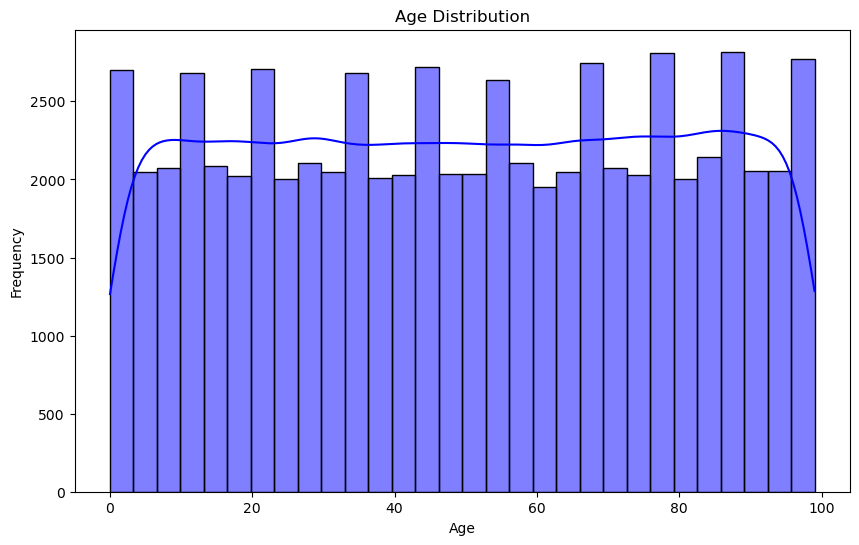

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["Age"], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

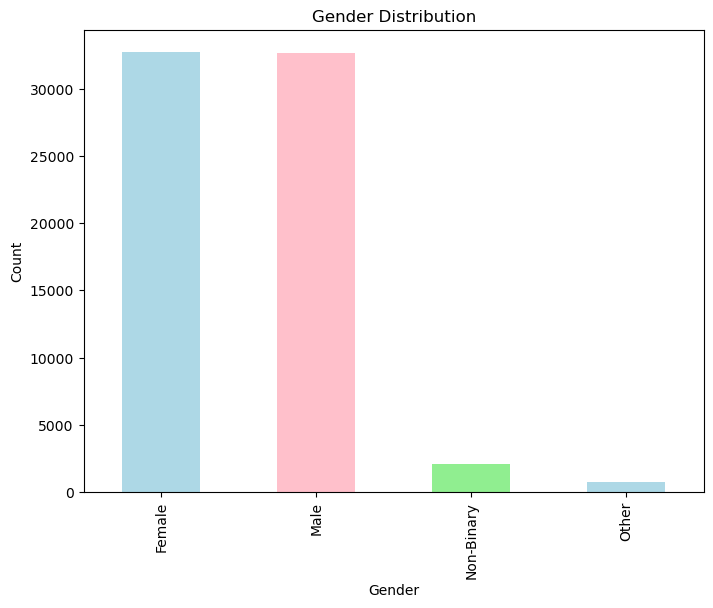

In [17]:
plt.figure(figsize=(8, 6))
data_cleaned["Gender"].value_counts().plot(kind="bar", color=['lightblue', 'pink', 'lightgreen'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_42172/4174872235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x="Readmitted", palette="viridis")


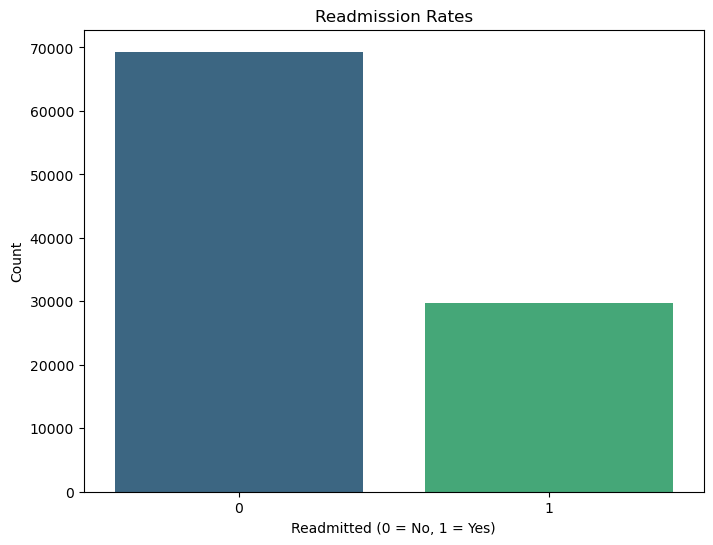

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x="Readmitted", palette="viridis")
plt.title("Readmission Rates")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_42172/173780496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x="Readmitted", y="Length_of_Stay", palette="coolwarm")


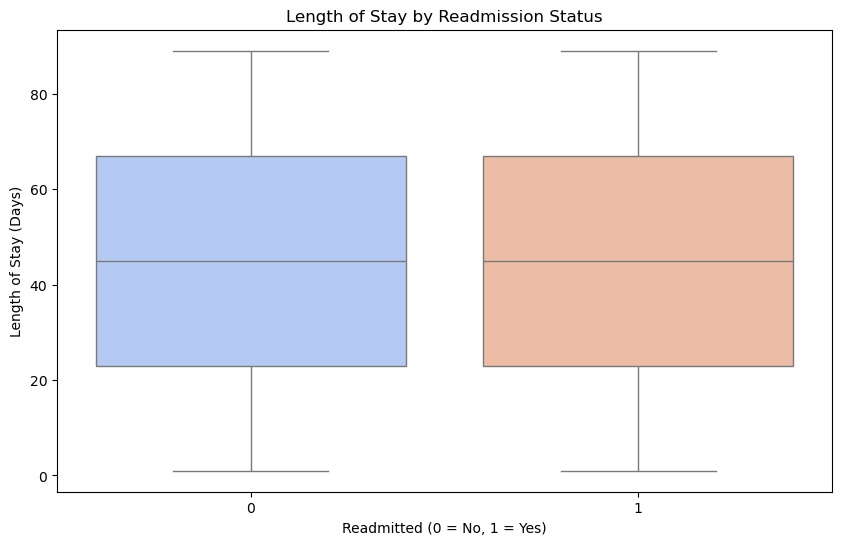

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x="Readmitted", y="Length_of_Stay", palette="coolwarm")
plt.title("Length of Stay by Readmission Status")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Length of Stay (Days)")
plt.show()

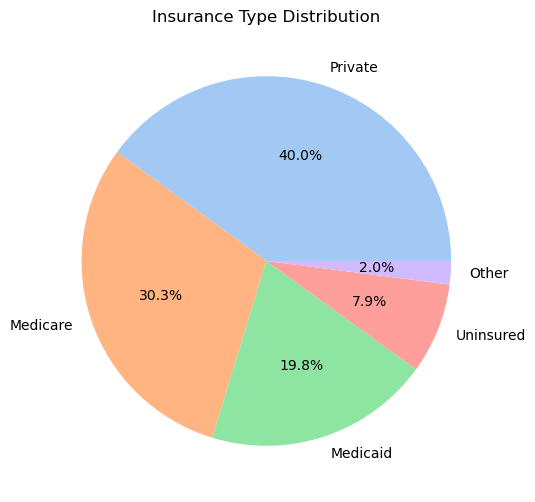

In [21]:
plt.figure(figsize=(10, 6))
data_cleaned["Insurance_Type"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Insurance Type Distribution")
plt.ylabel("")  # Remove y-label for better aesthetics
plt.show()

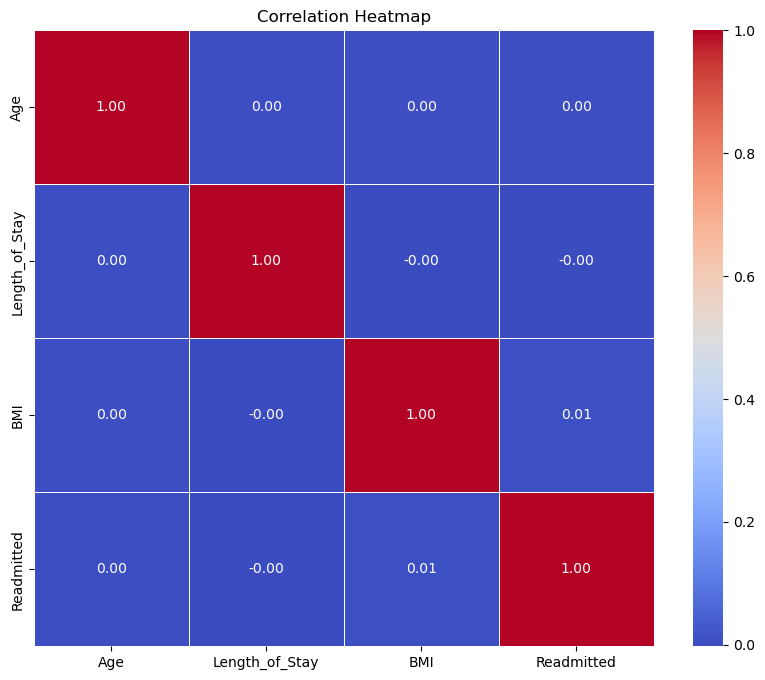

In [22]:
# Select only numeric columns for correlation
numeric_columns = data_cleaned.select_dtypes(include=["int64", "float64"])
correlation = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()